In [1]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, GaussianNoise, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report, silhouette_score


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split

from tensorflow import keras
from tensorflow.keras import layers

from imblearn.over_sampling import SMOTE

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create Dataframe from CSV file
df = pd.read_csv('data/transaction_dataset.csv')
df = df.copy()

In [3]:
# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index()
df

,index,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,7763,7763,102,0x0ae775637e63fa95855246fd82e96802d05883fc,1,1641.74,2103.12,327679.35,10,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Genaro X
1,8655,8655,994,0x731dcf009e769453336b53380af55985da6d1127,1,2811.51,837.98,9812.92,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2,106,106,107,0x011bed5908623f6adfcd54872ed88e0dc713a1bf,0,157.32,0.00,314.65,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,439,439,440,0x09f3f4f3362ffdb13e19c7d7f73f0b7d48856224,0,20.17,3.92,68.37,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2420,2420,2421,0x3f38c2ebd999386f7d6d3fefd741b5ee0733c310,0,4.38,24303.06,243074.38,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,5734,5734,2802,0x98db189554a651ae225b91496ec6c58be45ed64a,0,0.00,16197.17,226760.43,0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
9837,5191,5191,2259,0x89a788089cd0d98755123126baef7577a2355427,0,0.00,0.00,15369.12,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,None,Livepeer Token
9838,5390,5390,2458,0x8f51d6c3672f0e09fbbafa2ad6ddbdf66ac9972f,0,0.00,0.00,1.77,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9839,860,860,861,0x151f9b0c0d9e4aaedc17feb6d698f96c5e9c75ef,0,165.15,0.00,330.30,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [4]:
# Drop unwanted columns/ drop las 2 columns (might try later with dummies function)
df = df.drop(columns=['Unnamed: 0','Index','index',' ERC20 most sent token type',
       ' ERC20_most_rec_token_type','Address'])

# Drop row with NaN values
df = df.dropna()

In [5]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,1,1641.74,2103.12,327679.35,10,148,0,137,4,0.001000,...,2082.268173,419.127635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,1,2811.51,837.98,9812.92,2,5,0,4,2,0.490000,...,13.370000,13.370000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,157.32,0.00,314.65,2,1,0,1,2,101.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,20.17,3.92,68.37,3,2,0,2,3,12.690172,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4.38,24303.06,243074.38,10,10,0,2,1,0.574000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,0.00,16197.17,226760.43,0,14,1,6,0,0.000000,...,0.705159,0.611924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9837,0,0.00,0.00,15369.12,1,1,0,1,1,2.000000,...,312.430205,50.497598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
9838,0,0.00,0.00,1.77,1,1,0,1,1,1.990000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9839,0,165.15,0.00,330.30,2,2,0,2,2,49.770407,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = df.drop(columns=[' ERC20 avg time between rec tnx',' ERC20 avg time between contract tnx',' ERC20 max val sent contract',' ERC20 min val sent contract',' ERC20 avg time between rec 2 tnx',' ERC20 avg val sent contract',' ERC20 avg time between sent tnx'])

<AxesSubplot: >

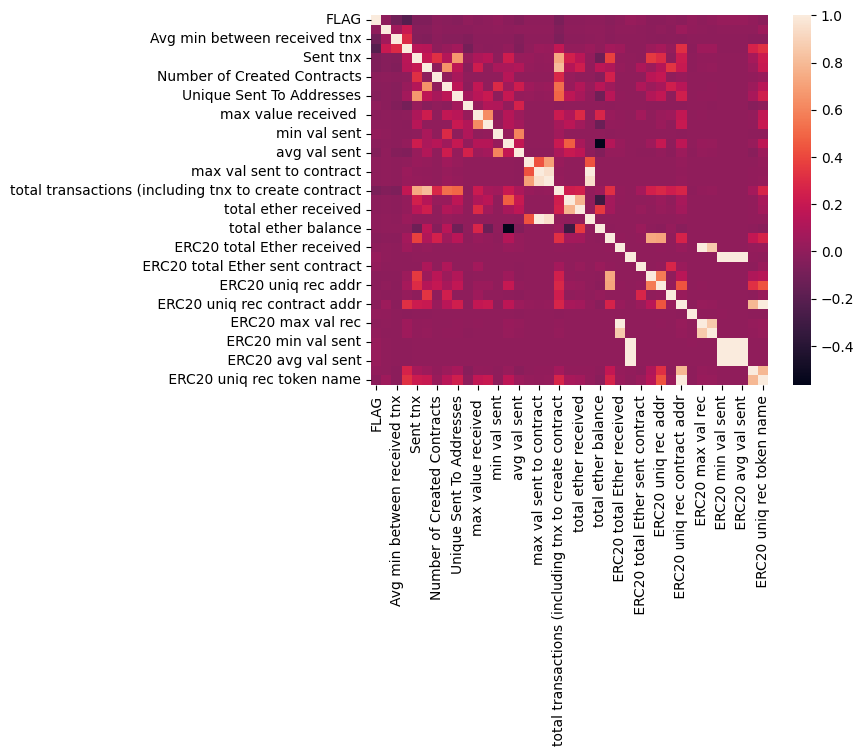

In [7]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [8]:
X= df.drop(columns=['FLAG'])
y = df['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print(f'Shape of training data before SMOTE: {X_train.shape}')
print(f'Shape of training data after SMOTE: {X_train_resampled.shape}')

Shape of training data before SMOTE: (6308, 38)
Shape of training data after SMOTE: (10724, 38)


In [10]:

model = Sequential([
     Dense(units=38, input_dim=X_train_resampled.shape[1], activation='relu'),
    #improve training performance and speed up the process by normalizing the inputs of each layer
     BatchNormalization(),
    #add some random noise to reduce overfitting with GaussianNoise(0.1),
     GaussianNoise(0.1),
     Dense(units=19, activation='relu', kernel_regularizer=l2(0.01)),
     BatchNormalization(),
     Dropout(0.5),
     GaussianNoise(0.1),
     Dense(units=9, activation='relu', kernel_regularizer=l2(0.01)),
     BatchNormalization(),
     Dropout(0.5),
     GaussianNoise(0.1),
     Dense(units=19, activation='relu', kernel_regularizer=l2(0.01)),
     BatchNormalization(),
     Dropout(0.5),
     GaussianNoise(0.1),
     Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1482      
                                                                 
 batch_normalization (BatchN  (None, 38)               152       
 ormalization)                                                   
                                                                 
 gaussian_noise (GaussianNoi  (None, 38)               0         
 se)                                                             
                                                                 
 dense_1 (Dense)             (None, 19)                741       
                                                                 
 batch_normalization_1 (Batc  (None, 19)               76        
 hNormalization)                                                 
                                                        

In [11]:
batch_size = 64
epochs = 15

###### Loss function 
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
######

model.fit(X_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_split=0.2, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
168/168 [==============================] - 7s 11ms/step - loss: 1.1658 - accuracy: 0.5622 - val_loss: 1.0904 - val_accuracy: 0.3277
Epoch 2/15
168/168 [==============================] - 1s 7ms/step - loss: 0.9974 - accuracy: 0.6055 - val_loss: 1.0217 - val_accuracy: 0.3376
Epoch 3/15
168/168 [==============================] - 1s 7ms/step - loss: 0.8910 - accuracy: 0.6363 - val_loss: 0.9414 - val_accuracy: 0.4678
Epoch 4/15
168/168 [==============================] - 1s 7ms/step - loss: 0.8044 - accuracy: 0.6657 - val_loss: 0.8412 - val_accuracy: 0.5096
Epoch 5/15
168/168 [==============================] - 1s 6ms/step - loss: 0.7347 - accuracy: 0.6969 - val_loss: 0.6899 - val_accuracy: 0.6124
Epoch 6/15
168/168 [==============================] - 1s 7ms/step - loss: 0.6745 - accuracy: 0.7266 - val_loss: 0.6222 - val_accuracy: 0.6342
Epoch 7/15
168/168 [==============================] - 1s 7ms/step - loss: 0.6314 - accuracy: 0.7412 - val_loss: 0.5520 - val_accuracy: 0.8473
Epoch

In [ ]:
# y_pred =model.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)

# print(cm)